# (A) Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline

# (B) Loading the dataset

In [2]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## dropping "unnamed" columns and rename v1 and v2 to "label" and "message"

In [3]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms = sms.rename(columns = {'v1':'label','v2':'message'})

In [4]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

countnig the length of the message 

In [5]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


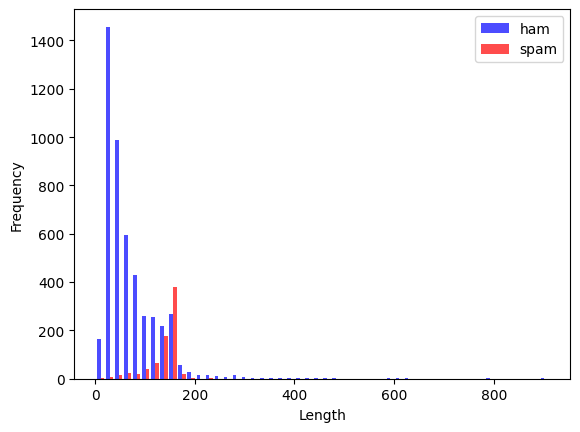

In [6]:
# Your data and plot
plt.hist([sms[sms['label']=='ham']['length'], sms[sms['label']=='spam']['length']], bins=50, alpha=0.7, color=['blue', 'red'], label=['ham', 'spam'])
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Looks like the lengthy is the message, more likely it is a spam.

## Text processing and vectorizing our meddages

In [7]:
text_feat = sms['message'].copy()

In [8]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    
    return " ".join(text)

In [9]:
import nltk

In [10]:
text_feat = text_feat.apply(text_process)

In [11]:
vectorizer = TfidfVectorizer(stop_words="english")

In [12]:
features = vectorizer.fit_transform(text_feat)

##  Classifiers and predictions

# Split our features to test and train set

In [13]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

Now let's import bunch of classifiers, initialize them and make a dictionary to itereate through

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Describing the methods 

In [16]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [17]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [18]:
# defining function for training the model
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)

In [41]:
# defining function for Predicting the model
def predict_labels(clf, features):
    return (clf.predict(features))

Now iterate through classifiers and save the results

In [20]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, accuracy_score(labels_test,pred)))

In [21]:
df = pd.DataFrame(pred_scores, columns=['Classifier', 'Score'])
df.set_index('Classifier', inplace=True)
df

,Score
Classifier,
SVC,0.976077
KN,0.905502
NB,0.984450
DT,0.957536
LR,0.941388
RF,0.970096
AdaBoost,0.971890
BgC,0.965311
ETC,0.975478


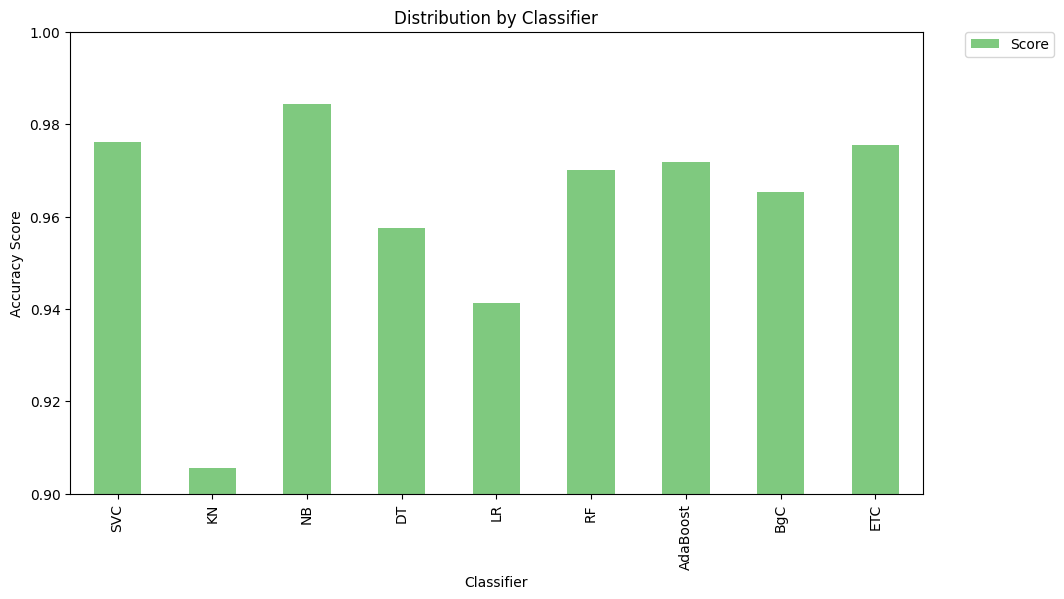

In [22]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Stemmer

In [23]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

Stem, split, fit - repeat... Predict!

In [24]:
text_feat = text_feat.apply(stemmer)

In [25]:
features = vectorizer.fit_transform(text_feat)

In [26]:
features_train, features_test, labels_train, labels_test = train_test_split(features, sms['label'], test_size=0.3, random_state=111)

In [27]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, accuracy_score(labels_test,pred)))

In [28]:
df2 = pd.DataFrame(pred_scores, columns=['Classifier', 'Score2'])
df2.set_index('Classifier', inplace=True)
df = pd.concat([df,df2],axis=1)
df

,Score,Score2
Classifier,,
SVC,0.976077,0.977273
KN,0.905502,0.908493
NB,0.984450,0.983254
DT,0.957536,0.965909
LR,0.941388,0.944378
RF,0.970096,0.974282
AdaBoost,0.971890,0.970096
BgC,0.965311,0.967105
ETC,0.975478,0.973086


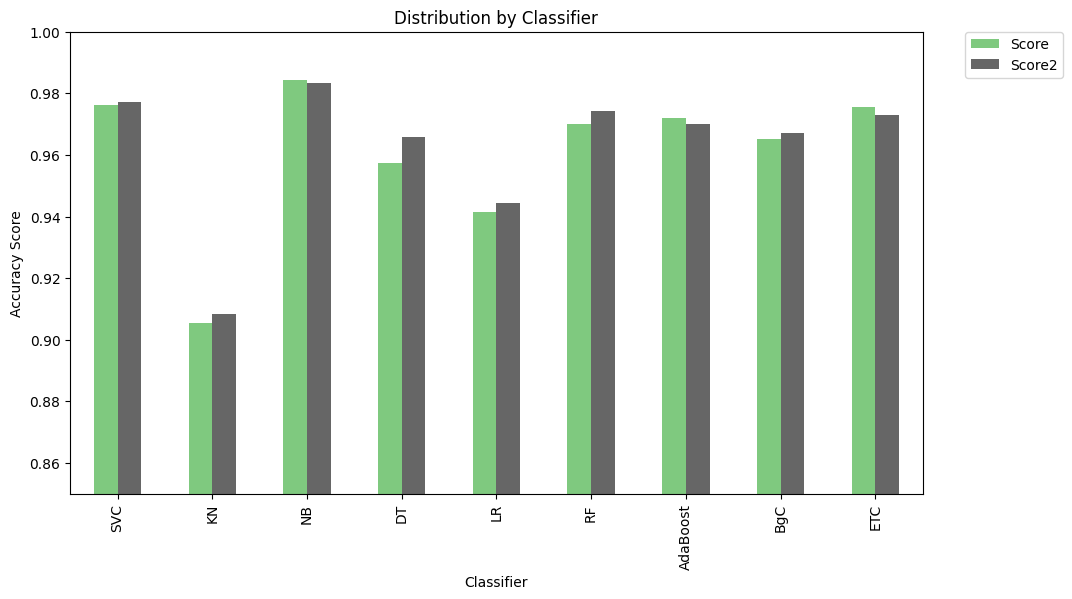

In [29]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [30]:
lf = sms['length'].to_numpy()
newfeat = np.hstack((np.asarray(features.todense()), lf[:, None]))

In [31]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, sms['label'], test_size=0.3, random_state=111)

In [32]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, accuracy_score(labels_test,pred)))

In [33]:
df3 = pd.DataFrame(pred_scores, columns=['Classifier', 'Score3'])
df3.set_index('Classifier', inplace=True)
df = pd.concat([df,df3],axis=1)
df

,Score,Score2,Score3
Classifier,,,
SVC,0.976077,0.977273,0.861244
KN,0.905502,0.908493,0.883373
NB,0.984450,0.983254,0.983852
DT,0.957536,0.965909,0.964115
LR,0.941388,0.944378,0.951555
RF,0.970096,0.974282,0.976675
AdaBoost,0.971890,0.970096,0.965909
BgC,0.965311,0.967105,0.963517
ETC,0.975478,0.973086,0.977871


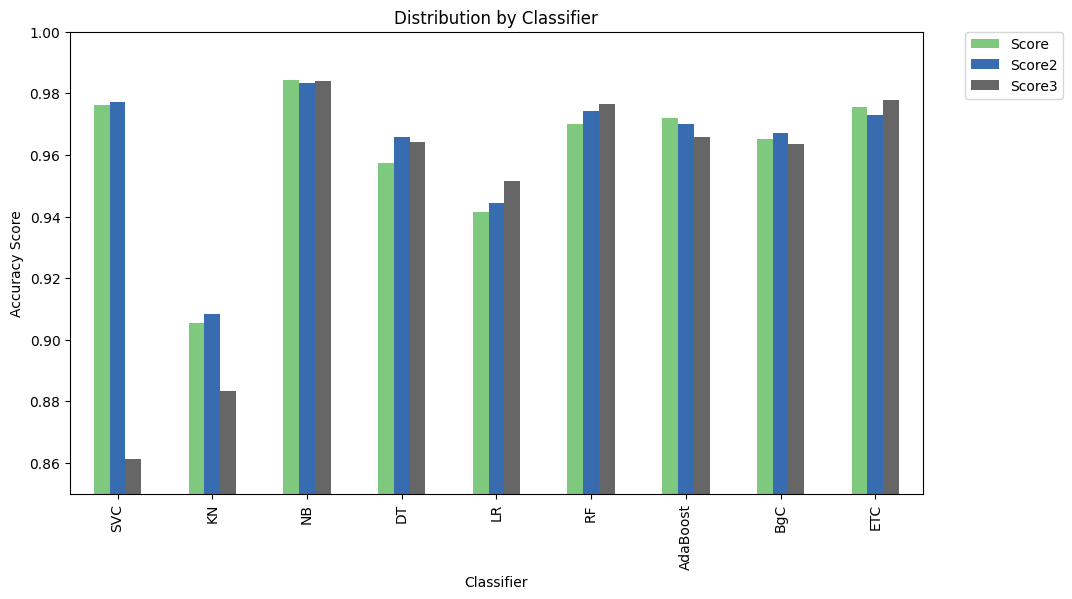

In [34]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Voting classifier

In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')

In [37]:
eclf.fit(features_train,labels_train)

VotingClassifier(estimators=[('BgC',
                              BaggingClassifier(n_estimators=9,
                                                random_state=111)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=9,
                                                   random_state=111)),
                             ('RF',
                              RandomForestClassifier(n_estimators=31,
                                                     random_state=111)),
                             ('Ada',
                              AdaBoostClassifier(n_estimators=62,
                                                 random_state=111))],
                 voting='soft')

In [38]:
pred = eclf.predict(features_test)

In [39]:
print(accuracy_score(labels_test,pred))

0.9766746411483254
